In [86]:
import sklearn
from sklearn import datasets
from sklearn import ensemble
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

In [87]:
data, target = datasets.load_iris(as_frame=True, return_X_y=True)

In [132]:
X, y = datasets.load_iris(return_X_y=True)

In [89]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
X = X[:,2:]

In [134]:
X.shape

(150, 2)

In [135]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)

In [136]:
isolated_tree_classifier = ensemble.IsolationForest()

In [137]:
isolated_tree_classifier.fit(train_x, train_y)

IsolationForest()

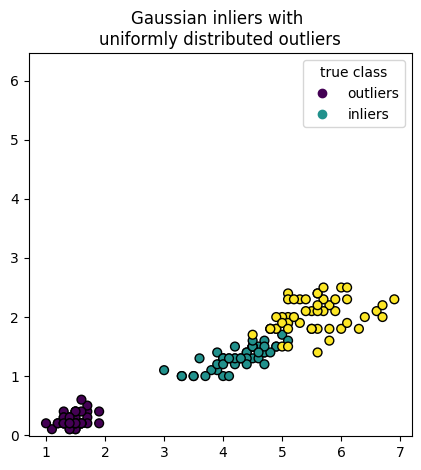

In [138]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("Gaussian inliers with \nuniformly distributed outliers")
plt.tight_layout()
plt.show()

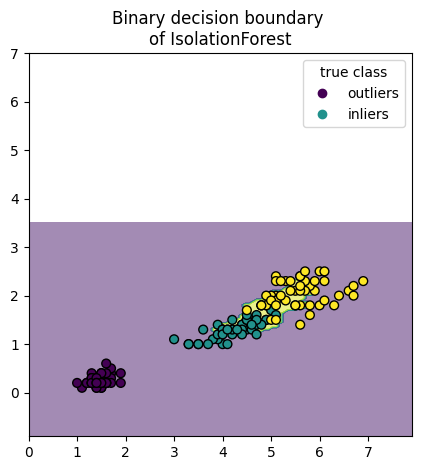

In [139]:
disp = DecisionBoundaryDisplay.from_estimator(
    isolated_tree_classifier,
    X,
    response_method="predict",
    alpha=0.5,
)

disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.tight_layout()
plt.show()

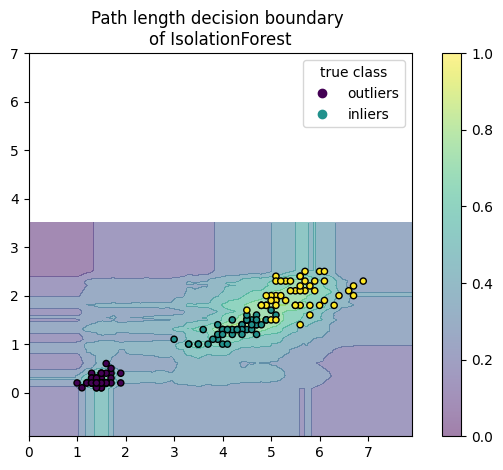

In [140]:
disp = DecisionBoundaryDisplay.from_estimator(
    isolated_tree_classifier,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.tight_layout()
plt.show()